## Clasificación Tensorflow
- En este notebook se definen las capas y los ciclos de entrenamiento.

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 1.- Pipeline

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert y_train and y_test to one hot 
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=num_classes, dtype='float32'
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=num_classes, dtype='float32'
)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


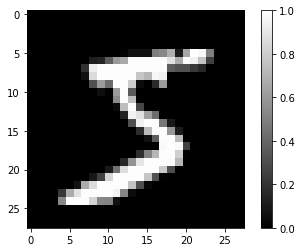

In [3]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

In [4]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
x_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [5]:
ds_len = len(x_train)
batch_size = 64

In [6]:
x_train = tf.data.Dataset.from_tensor_slices(x_train)
y_train = tf.data.Dataset.from_tensor_slices(y_train)

x_test = tf.data.Dataset.from_tensor_slices(x_test)
y_test = tf.data.Dataset.from_tensor_slices(y_test)

train_ds = tf.data.Dataset.zip((x_train, y_train))
train_ds = train_ds.shuffle(len(train_ds)).batch(batch_size)

test_ds = tf.data.Dataset.zip((x_test, y_test))
test_ds = test_ds.batch(batch_size)

test_batch = next(iter(train_ds))
test_batch[0].shape, test_batch[1].shape

(TensorShape([64, 784]), TensorShape([64, 10]))

## 2.- Definir capa con tensorflow
- Definir una clase Linear(tf.keras.layers.Layer) y su método build() 

In [7]:
import tensorflow as tf

In [8]:
class Linear(layers.Layer):
  def __init__(self, num_outputs, activation=None):
    super(Linear, self).__init__()
    self.num_outputs = num_outputs
    self.activation = activation

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]), 
                                         self.num_outputs])
    self.bias = self.add_weight("bias",
                                shape=[1, self.num_outputs])

  def call(self, inputs):
    x = tf.matmul(inputs, self.kernel) + self.bias
    
    if self.activation == 'relu':
        x = tf.nn.relu(x)
    elif self.activation == 'sigmoid':
        x = tf.math.sigmoid(x)

    return x


layer = Linear(10, 'relu')
layer(tf.ones([1, 784]))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.11009014, 0.        , 0.        , 0.        , 0.        ,
        1.0889826 , 0.        , 0.        , 0.02813172, 0.        ]],
      dtype=float32)>

In [9]:
epochs = 10
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

- Una sola capa

In [10]:
model = tf.keras.Sequential([
    Linear(10),
])

optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(loss=loss_fn,
              optimizer=optimizer)

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs, verbose=1)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 1.4196 - val_loss: 0.8740
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7244 - val_loss: 0.5881
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5472 - val_loss: 0.4786
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4663 - val_loss: 0.4213
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4199 - val_loss: 0.3855
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3900 - val_loss: 0.3619
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3692 - val_loss: 0.3465
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3541 - val_loss: 0.3341
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3424 - val_loss: 0.3245
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3333 - val_loss: 0.3167

- Una capa oculta con activación sigmoide

In [11]:
model = tf.keras.Sequential([
    Linear(256, 'sigmoid'),
    Linear(10),
])

optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(loss=loss_fn,
              optimizer=optimizer)

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs, verbose=1)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 1.1076 - val_loss: 0.6057
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.5092 - val_loss: 0.4140
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3903 - val_loss: 0.3452
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3381 - val_loss: 0.3086
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3073 - val_loss: 0.2856
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2861 - val_loss: 0.2701
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2695 - val_loss: 0.2565
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2555 - val_loss: 0.2445
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2430 - val_loss: 0.2343
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2321 - val_loss: 0.2259

- Una capa oculta con activación relu

In [12]:
model = tf.keras.Sequential([
    Linear(256, 'relu'),
    Linear(10),
])

optimizer = tf.keras.optimizers.Adam(0.0001)

model.compile(loss=loss_fn,
              optimizer=optimizer)

history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs, verbose=1)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.6688 - val_loss: 0.3286
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2982 - val_loss: 0.2532
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2420 - val_loss: 0.2214
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2071 - val_loss: 0.1909
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1819 - val_loss: 0.1754
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1620 - val_loss: 0.1587
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1460 - val_loss: 0.1451
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1321 - val_loss: 0.1350
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1209 - val_loss: 0.1262
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1111 - val_loss: 0.1211

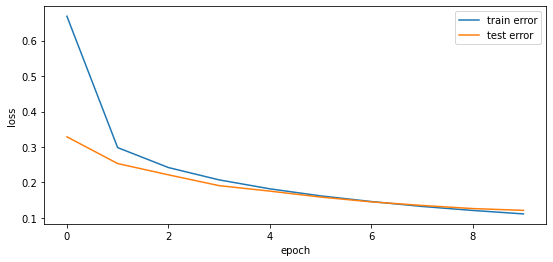

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 4))

plt.xlabel('epoch')
plt.ylabel('loss')

plt.plot(model.history.history['loss'], label='train error')
plt.plot(model.history.history['val_loss'], label='test error')

plt.legend()
plt.show()

## 3.- Ciclo de entrenamiento y pipeline

- Definir train_step

In [14]:
@tf.function
def train_step(batch, model, optimizer):
    x, y = batch

    with tf.GradientTape() as tape:
        output = model(x, training=True)  # Logits for this minibatch
        #print(output)
        # Compute the loss value for this minibatch.
        loss_value = loss_fn(y, output)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss_value

- Entrenamiento

In [15]:
model = tf.keras.Sequential([
    Linear(256, 'relu'),
    Linear(10),
])

optimizer = tf.keras.optimizers.Adam(0.0001)

In [16]:
epochs = 10
loss_epoch = []

for epoch in range(epochs):
    loss = 0.0
    for batch in train_ds:
        loss += train_step(batch, model, optimizer)
    total_loss = loss / len(train_ds)
    print(total_loss)
    loss_epoch.append(total_loss.numpy())

tf.Tensor(0.6552077, shape=(), dtype=float32)
tf.Tensor(0.2902704, shape=(), dtype=float32)
tf.Tensor(0.23472665, shape=(), dtype=float32)
tf.Tensor(0.20083404, shape=(), dtype=float32)
tf.Tensor(0.17599782, shape=(), dtype=float32)
tf.Tensor(0.15675485, shape=(), dtype=float32)
tf.Tensor(0.14098766, shape=(), dtype=float32)
tf.Tensor(0.12813853, shape=(), dtype=float32)
tf.Tensor(0.11708063, shape=(), dtype=float32)
tf.Tensor(0.10749421, shape=(), dtype=float32)


## Ejercicio

- Definir función __test_step()__ para evaluación
- Modificar la arquitectura para mejorar el modelo
- Experimentar con diferentes funciones de activación
